In [667]:
import pandas as pd ## pandas is used to manupulate the dataframe
import numpy as np ## numpy is used to do scientific calculations
import matplotlib.pyplot as plt ## matplotlib used for visualization
import seaborn as sns
import missingno as msno ## used to visualize missing values
import warnings ## used to remove warnings
warnings.filterwarnings('ignore')

In [668]:
df = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

In [669]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [670]:
test_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [671]:
print(test_data.shape)
df.shape

(1459, 80)


(1460, 81)

In [672]:

df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [673]:
print(test_data.info())
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

In [674]:
print(test_data.duplicated().sum())
df.duplicated().sum()

0


0

In [675]:
pd.options.display.max_rows = None         # To display all the rows
df.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

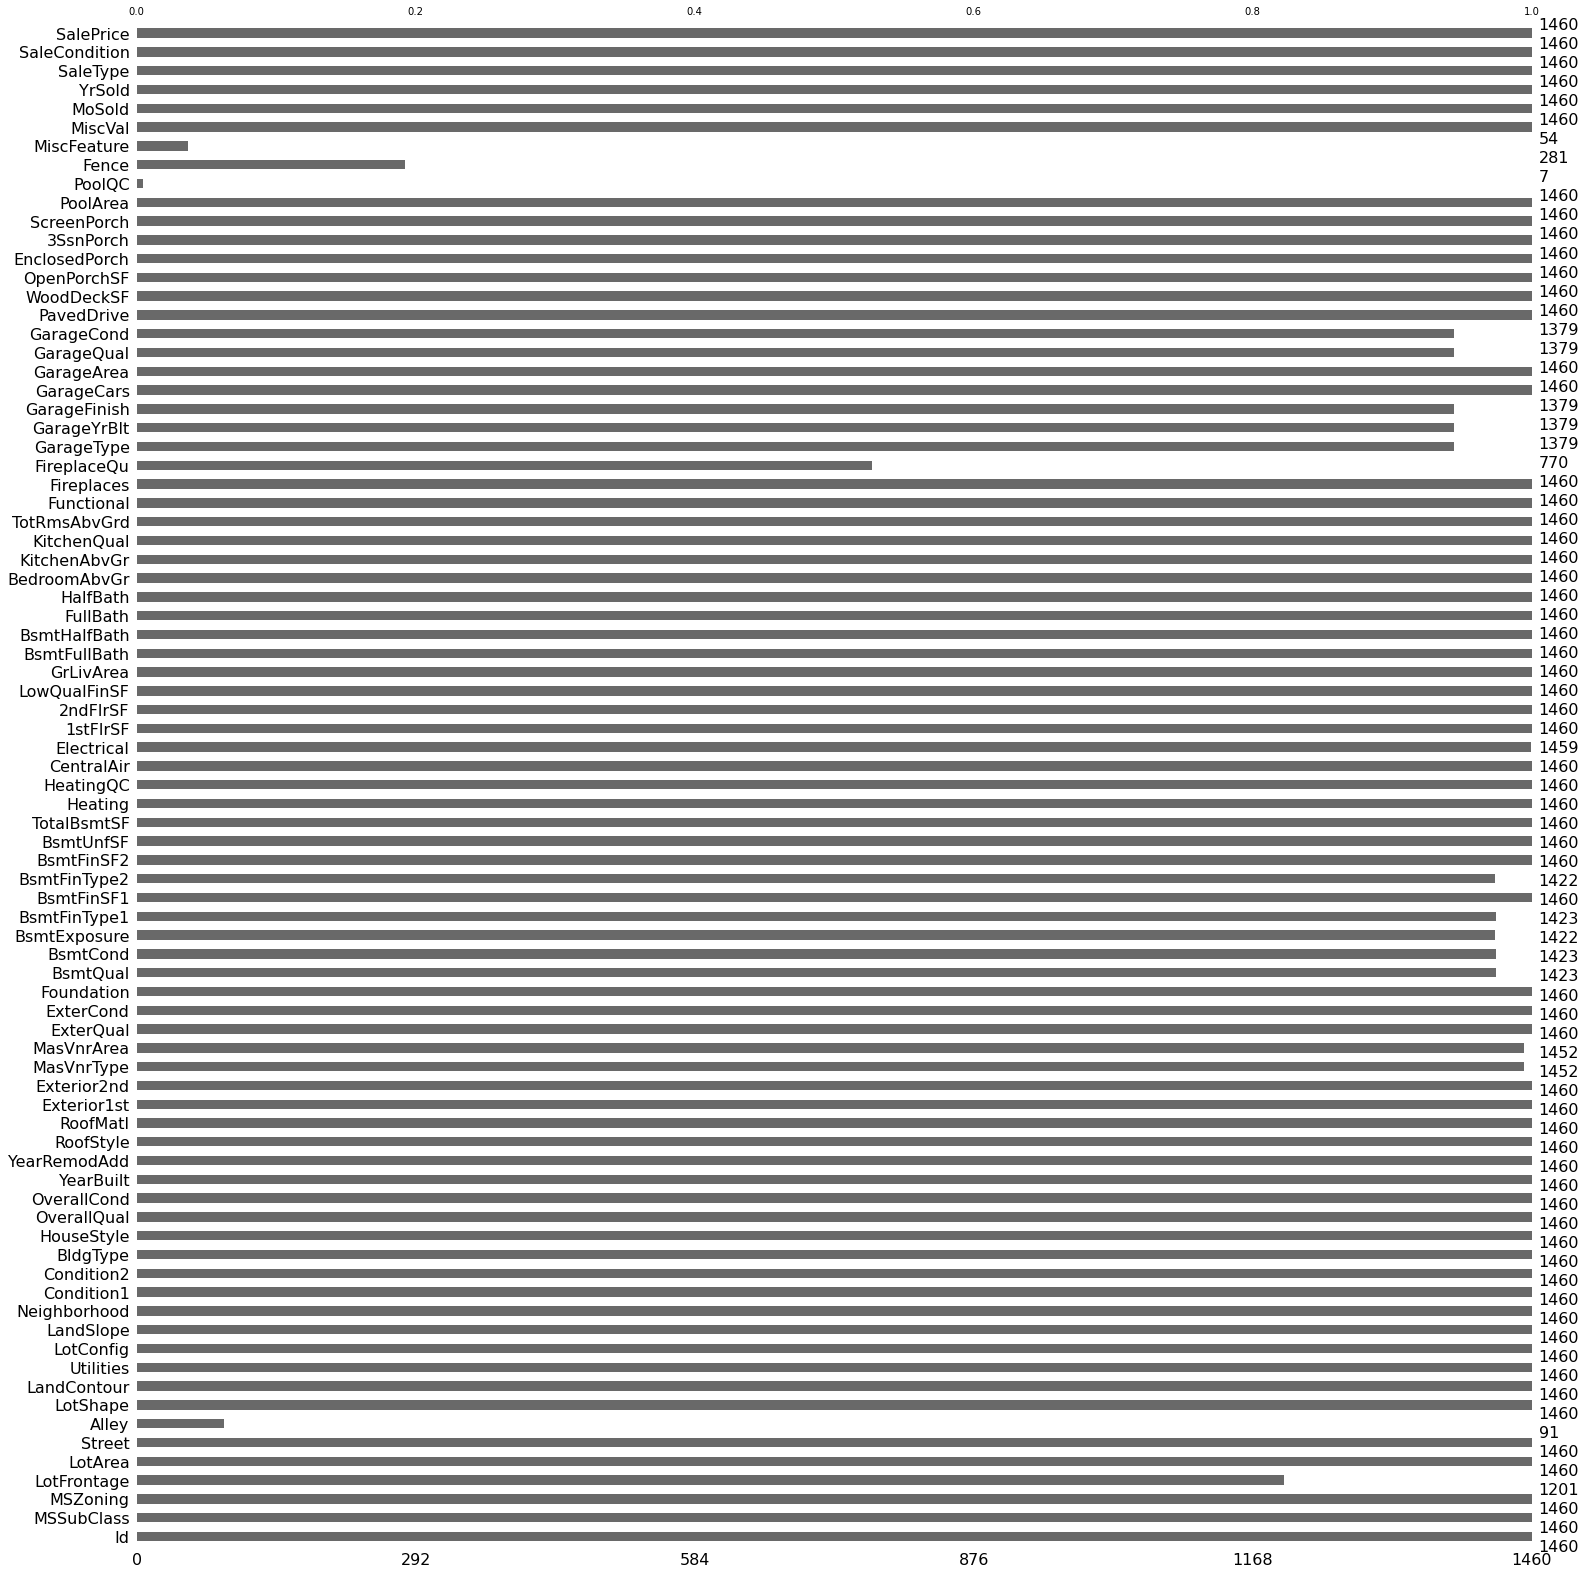

In [676]:
msno.bar(df)          # plots the graph between columns and number of non null in each column
plt.show()

<AxesSubplot:>

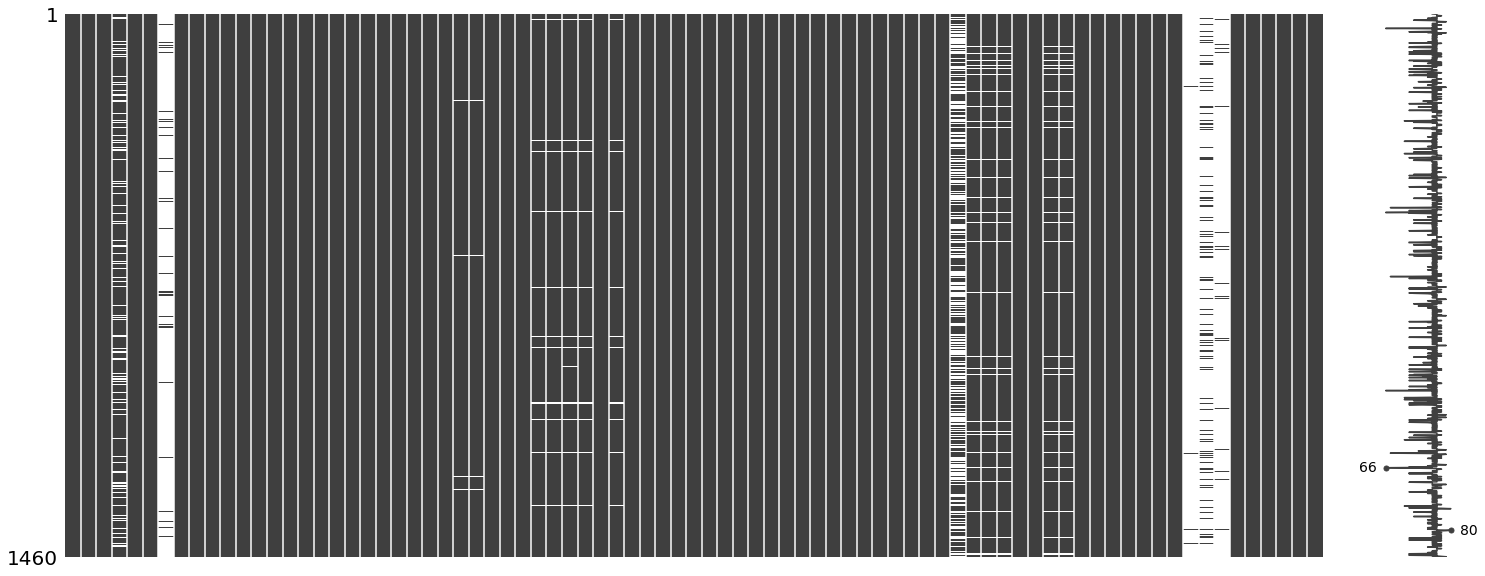

In [677]:
msno.matrix(df)

<AxesSubplot:>

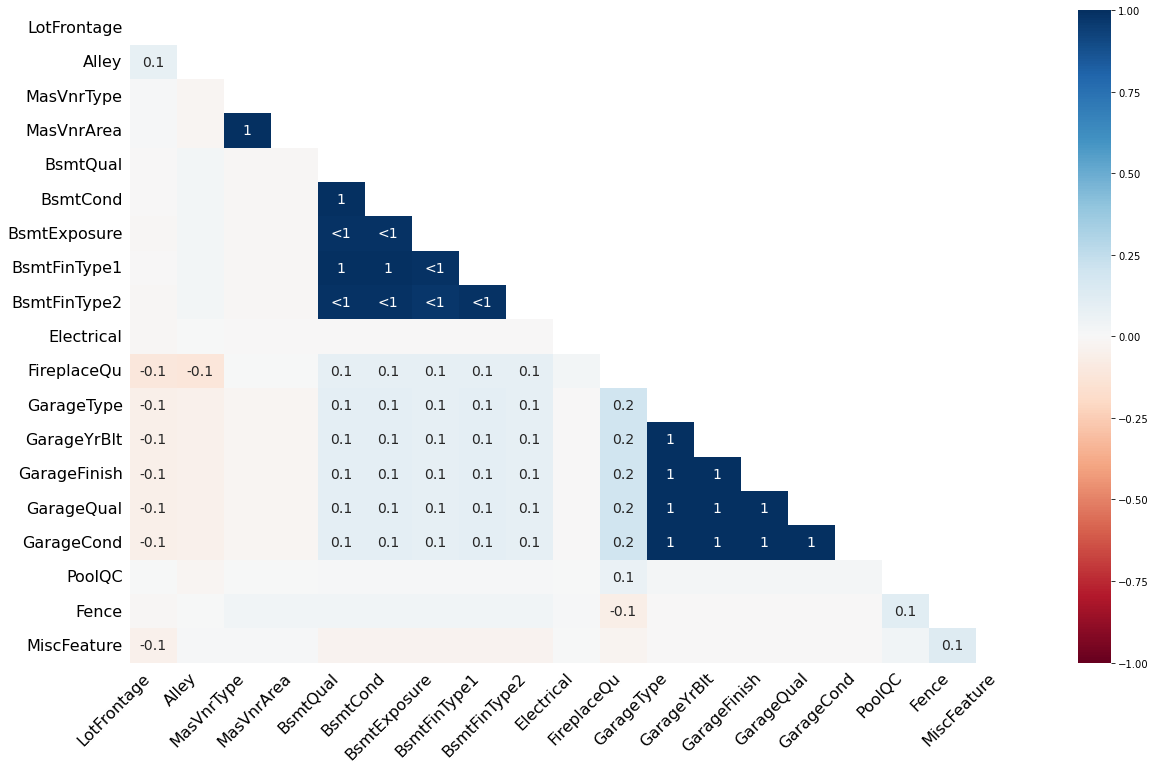

In [678]:
msno.heatmap(df)

<AxesSubplot:>

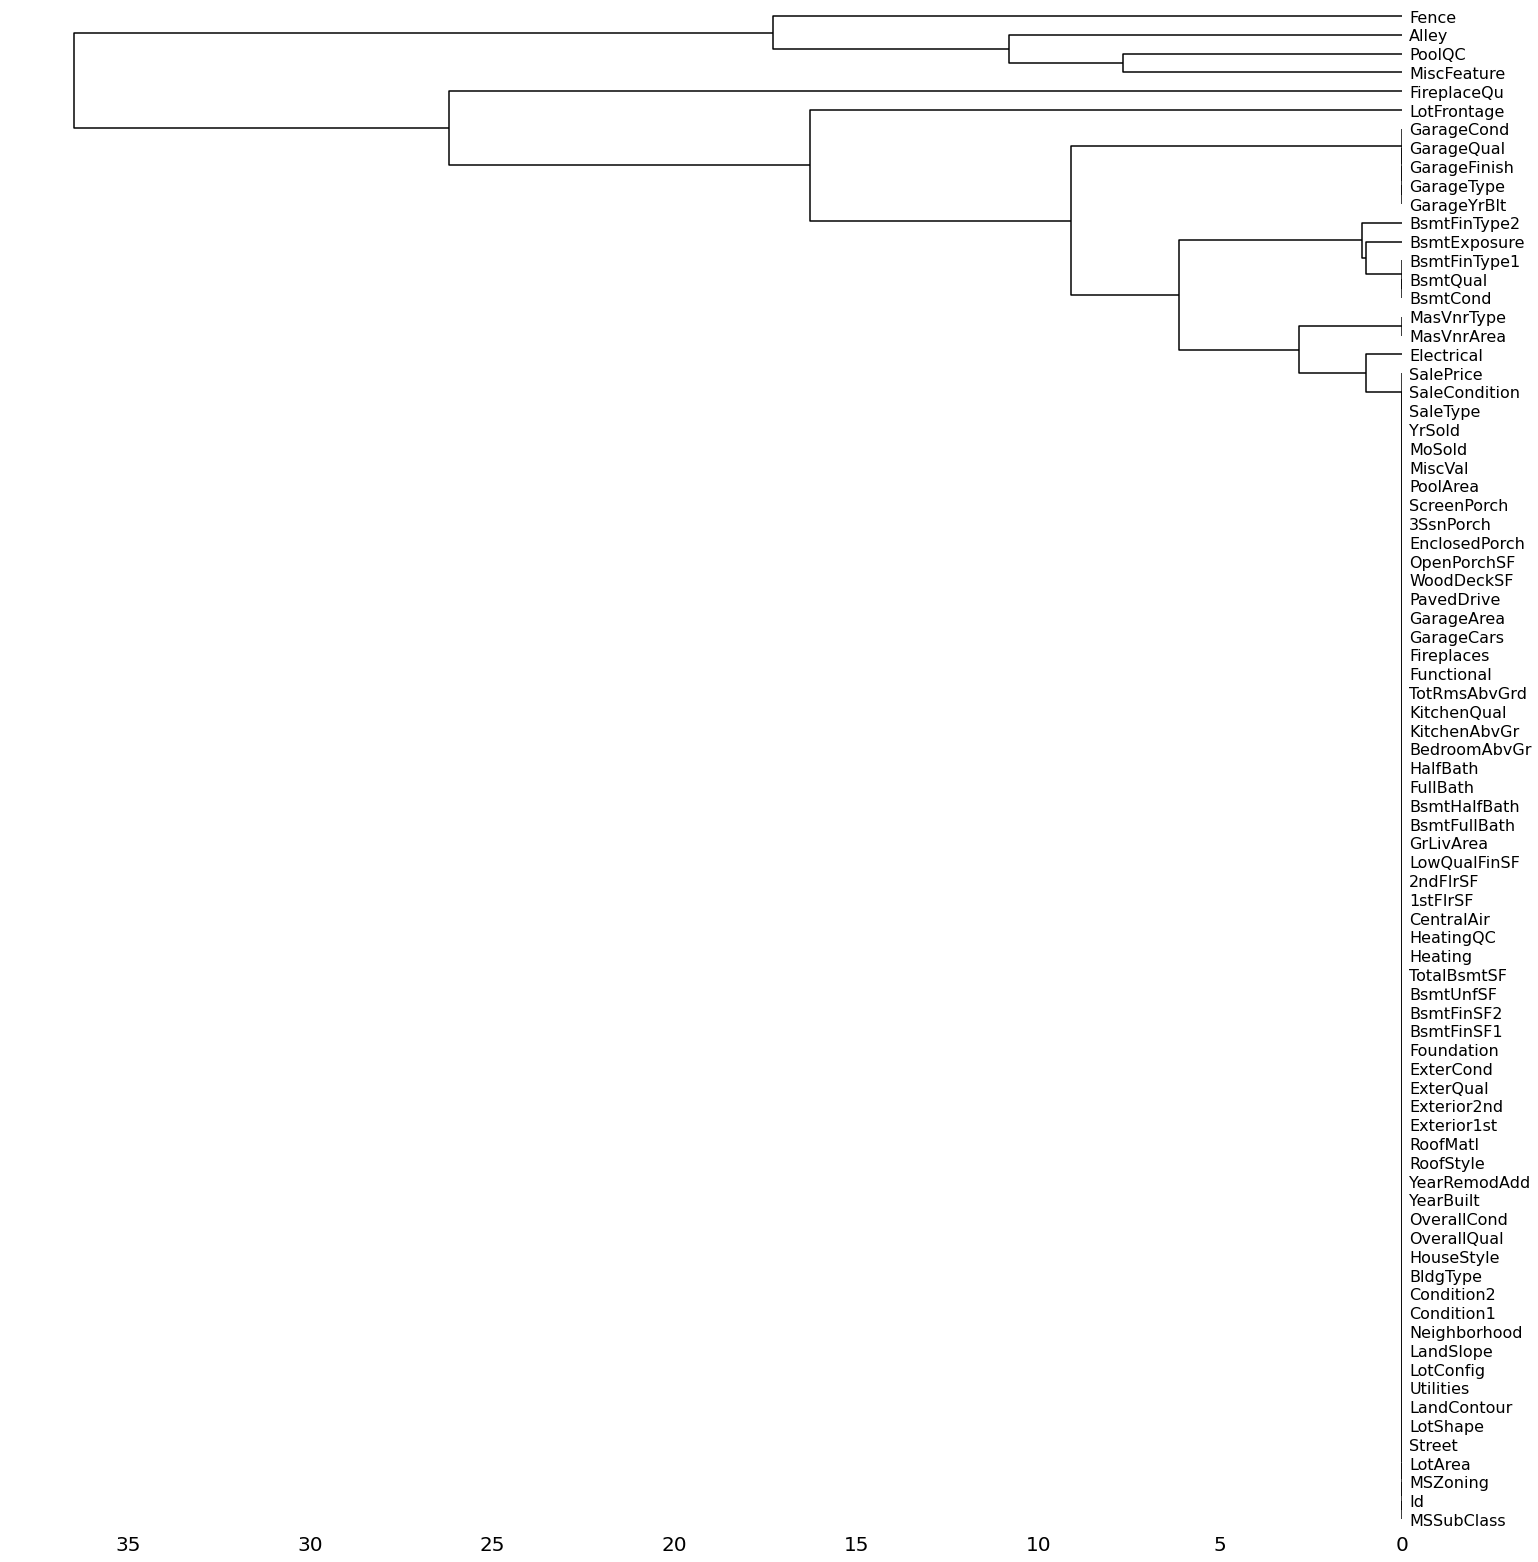

In [679]:
msno.dendrogram(df)

In [680]:
pd.reset_option('max_rows')        # to reset the max column to default value

In [681]:
df.LotFrontage.value_counts()      # counts the freq of values in a column. 60 occurs 143 times

60.0     143
70.0      70
80.0      69
50.0      57
75.0      53
        ... 
137.0      1
141.0      1
38.0       1
140.0      1
46.0       1
Name: LotFrontage, Length: 110, dtype: int64

In [682]:
test_data.LotFrontage.value_counts()

60.0     133
80.0      68
70.0      63
50.0      60
75.0      52
        ... 
117.0      1
31.0       1
119.0      1
25.0       1
140.0      1
Name: LotFrontage, Length: 115, dtype: int64

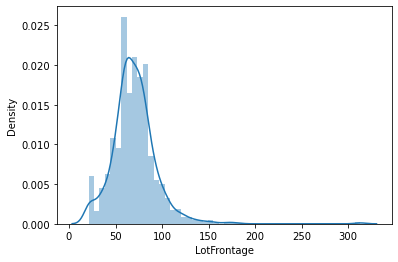

In [683]:
sns.distplot(df.LotFrontage)
plt.show()

In [684]:
df.LotFrontage.mean()

70.04995836802665

In [685]:
df.LotFrontage.isnull().sum()/len(df.LotFrontage)   # fraction of null values in lotFrontage column

0.1773972602739726

In [686]:
df.loc[(df.LotFrontage.isnull() == True),'LotFrontage']  = df.LotFrontage.mean() # To fill all NaN with mean

In [687]:
test_data.loc[(test_data.LotFrontage.isnull() == True),'LotFrontage']  = test_data.LotFrontage.mean() # To fill all NaN with mean

In [688]:
null_col = df[['Alley','PoolQC','Fence','MiscFeature']]

df.LotFrontage.isnull().sum()

0

In [689]:
null_col_test = test_data[['Alley','PoolQC','Fence','MiscFeature']]

test_data.LotFrontage.isnull().sum()

0

In [690]:
null_col.isnull().sum()/len(null_col)*100        # percentage of null values in ['Alley','PoolQC','Fence','MiscFeature'] col

Alley          93.767123
PoolQC         99.520548
Fence          80.753425
MiscFeature    96.301370
dtype: float64

In [691]:
null_col_test.isnull().sum()/len(null_col)*100        # percentage of null values in ['Alley','PoolQC','Fence','MiscFeature'] col

Alley          92.602740
PoolQC         99.726027
Fence          80.068493
MiscFeature    96.438356
dtype: float64

##### More than 80% data are missing in 'Alley','PoolQC','Fence','MiscFeature' columns

In [692]:
df.drop(['Alley','PoolQC','Fence','MiscFeature'],axis=1, inplace=True)

In [693]:
test_data.drop(['Alley','PoolQC','Fence','MiscFeature'],axis=1, inplace=True)

In [694]:
null_col2 = df[['BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2']]
null_col2.isnull().sum()/len(null_col2) * 100

BsmtQual        2.534247
BsmtCond        2.534247
BsmtExposure    2.602740
BsmtFinType1    2.534247
BsmtFinType2    2.602740
dtype: float64

In [695]:
null_col2_test = test_data[['BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2']]
null_col2_test.isnull().sum()/len(null_col2_test) * 100

BsmtQual        3.015764
BsmtCond        3.084304
BsmtExposure    3.015764
BsmtFinType1    2.878684
BsmtFinType2    2.878684
dtype: float64

In [696]:
df[['BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2']] = null_col2.fillna('NA')

In [697]:
test_data[['BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2']] = null_col2_test.fillna('NA')

In [698]:
df['BsmtCond'].value_counts()

TA    1311
Gd      65
Fa      45
NA      37
Po       2
Name: BsmtCond, dtype: int64

In [699]:
test_data['BsmtCond'].value_counts()

TA    1295
Fa      59
Gd      57
NA      45
Po       3
Name: BsmtCond, dtype: int64

In [700]:
df.MasVnrType.isnull().sum()

8

In [701]:
test_data.MasVnrType.isnull().sum()

16

In [702]:
df.MasVnrType.value_counts()

None       864
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64

In [703]:
test_data.MasVnrType.value_counts()

None       878
BrkFace    434
Stone      121
BrkCmn      10
Name: MasVnrType, dtype: int64

In [704]:
df.loc[df['MasVnrType'].isnull() == True, 'MasVnrType'] = 'None'     # filling MasVnrType with None

In [705]:
test_data.loc[test_data['MasVnrType'].isnull() == True, 'MasVnrType'] = 'None'     # filling MasVnrType with None

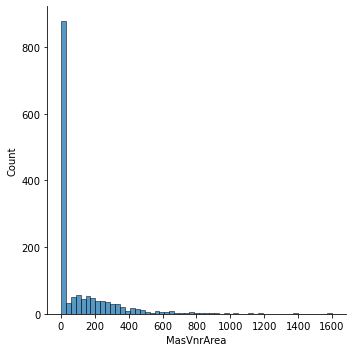

In [706]:
df.MasVnrArea.isna().sum()
sns.displot(df.MasVnrArea)
plt.show()

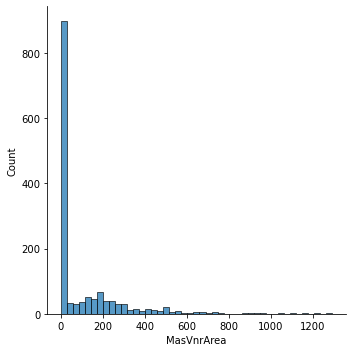

In [707]:
test_data.MasVnrArea.isna().sum()
sns.displot(test_data.MasVnrArea)
plt.show()

In [708]:
df.MasVnrArea.median()

0.0

In [709]:
test_data.MasVnrArea.median()

0.0

In [710]:
df.loc[df.MasVnrArea.isnull() == True] = df.MasVnrArea.median()    #filling MasVnrArea with its median
test_data.loc[test_data.MasVnrArea.isnull() == True] = test_data.MasVnrArea.median()

In [711]:
df.Electrical.value_counts()

SBrkr    1326
FuseA      94
FuseF      27
0.0         8
FuseP       3
Mix         1
Name: Electrical, dtype: int64

In [712]:
test_data.Electrical.value_counts()

SBrkr    1322
FuseA      94
FuseF      23
0.0        15
FuseP       5
Name: Electrical, dtype: int64

In [713]:
df.loc[df.Electrical.isnull() == True, 'Electrical'] = 'SBrkr'

In [714]:
test_data.loc[test_data.Electrical.isnull() == True, 'Electrical'] = 'SBrkr'

In [715]:
df.FireplaceQu.value_counts()

Gd     378
TA     311
Fa      33
Ex      24
Po      20
0.0      8
Name: FireplaceQu, dtype: int64

In [716]:
test_data.FireplaceQu.value_counts()

Gd     357
TA     276
Fa      41
Po      26
Ex      19
0.0     15
Name: FireplaceQu, dtype: int64

In [717]:
null_col3 = df[['GarageType','GarageFinish','GarageQual','GarageCond','FireplaceQu' ]]
df[['GarageType','GarageFinish','GarageQual','GarageCond','FireplaceQu']] = null_col3.fillna('NA')

In [718]:
null_col3_test = test_data[['GarageType','GarageFinish','GarageQual','GarageCond','FireplaceQu' ]]
test_data[['GarageType','GarageFinish','GarageQual','GarageCond','FireplaceQu']] = null_col3_test.fillna('NA')

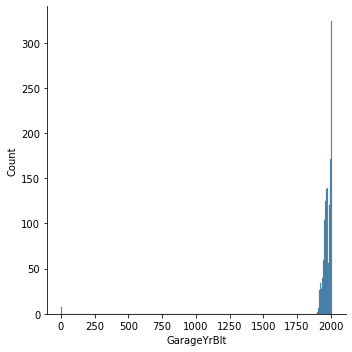

In [719]:
# df['GarageYrBlt']
sns.displot(df.GarageYrBlt)

In [720]:
df.GarageYrBlt.median()

1979.0

In [721]:
test_data.GarageYrBlt.median()

1978.0

In [722]:
df.loc[df['GarageYrBlt'].isnull() == True, 'GarageYrBlt'] = df.GarageYrBlt.median()

In [723]:
test_data.loc[test_data['GarageYrBlt'].isnull() == True, 'GarageYrBlt'] = test_data.GarageYrBlt.median()

In [724]:
pd.options.display.max_rows = None
df.isnull().sum()

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       0
BsmtFinType2     0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
KitchenQual 

In [727]:
pd.options.display.max_rows = None
test_data.isnull().sum()

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       0
BsmtFinType2     0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
KitchenQual 

In [726]:
null_col3_test = test_data[['MSZoning','Utilities','Exterior1st','Exterior2nd','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF',
                      'BsmtFullBath','BsmtHalfBath','KitchenQual','Functional','GarageCars','GarageArea','SaleType']]
test_data[['MSZoning','Utilities','Exterior1st','Exterior2nd','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF',
                      'BsmtFullBath','BsmtHalfBath','KitchenQual','Functional','GarageCars','GarageArea','SaleType']] = null_col3_test.fillna('NA')

### Exploratary Data Analysis

### Changing categorical data to Numerical data

In [728]:
df_object = df.select_dtypes(object).columns

In [729]:
df_object_test = test_data.select_dtypes(object).columns

In [730]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [731]:
df['MSZoning'] = le.fit_transform(df['MSZoning'].astype('str'))

In [732]:
df['MSZoning'].unique()

array([4, 5, 1, 2, 0, 3])

In [733]:
type(df['MSZoning'][0])

numpy.int32

In [734]:
for features in df_object:
    df[features] = le.fit_transform(df[features].astype('str'))

In [735]:
for features in df_object_test:
    test_data[features] = le.fit_transform(test_data[features].astype('str'))

In [736]:
len(df.columns)
len(test_data.columns)

76

In [737]:
len(df.select_dtypes(object).columns) + len(df.select_dtypes(float).columns) +len(df.select_dtypes(int).columns)

77

In [738]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 77 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   int32  
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   int32  
 6   LotShape       1460 non-null   int32  
 7   LandContour    1460 non-null   int32  
 8   Utilities      1460 non-null   int32  
 9   LotConfig      1460 non-null   int32  
 10  LandSlope      1460 non-null   int32  
 11  Neighborhood   1460 non-null   int32  
 12  Condition1     1460 non-null   int32  
 13  Condition2     1460 non-null   int32  
 14  BldgType       1460 non-null   int32  
 15  HouseStyle     1460 non-null   int32  
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [739]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 76 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1459 non-null   int32  
 3   LotFrontage    1459 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   int32  
 6   LotShape       1459 non-null   int32  
 7   LandContour    1459 non-null   int32  
 8   Utilities      1459 non-null   int32  
 9   LotConfig      1459 non-null   int32  
 10  LandSlope      1459 non-null   int32  
 11  Neighborhood   1459 non-null   int32  
 12  Condition1     1459 non-null   int32  
 13  Condition2     1459 non-null   int32  
 14  BldgType       1459 non-null   int32  
 15  HouseStyle     1459 non-null   int32  
 16  OverallQual    1459 non-null   int64  
 17  OverallCond    1459 non-null   int64  
 18  YearBuil

### Feature Scaling

In [740]:
x = df.drop(['Id','SalePrice'], axis=1)
y = df['SalePrice']

In [741]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [742]:
x_scaled = scaler.fit_transform(x)

### Model creation

In [743]:
from sklearn.model_selection import train_test_split
# tts = train_test_split()

In [744]:
x_train, x_test, y_train, y_test = train_test_split(x_scaled,y,test_size=0.20, random_state= 43)

## Model Evaluation

### Linear Regression

In [745]:
from sklearn.linear_model import LinearRegression
LR = LinearRegression()

In [746]:
LR.fit(x_train,y_train)

LinearRegression()

In [747]:
x_test_pred_LR = LR.predict(x_test)

In [748]:
x_test_pred_LR.shape

(292,)

In [749]:
y_test.shape

(292,)

In [750]:
x_train_pred_LR = LR.predict(x_train)

In [751]:
x_train_pred_LR.shape

(1168,)

In [752]:
y_train.shape

(1168,)

##### Accuracy score

In [753]:
print('Linear Regression score for trained data :', LR.score(x_train,y_train))

Linear Regression score for trained data : 0.8560033733279747


In [754]:
print('Linear Regression score for test data :', LR.score(x_test,y_test))

Linear Regression score for test data : 0.8187861581879323


##### Evaluation metrics for Linear Regression

In [755]:
from sklearn.metrics import r2_score

In [756]:
print('r2 score for training data : ',r2_score(y_train,x_train_pred_LR))
print('r2 score for test data : ',r2_score(y_test,x_test_pred_LR))

r2 score for training data :  0.8560033733279747
r2 score for test data :  0.8187861581879323


#### Model is dependent on random state

### Random forest regressor

In [757]:
from sklearn.ensemble import RandomForestRegressor

In [758]:
RF = RandomForestRegressor()

In [759]:
RF.fit(x_train,y_train)

RandomForestRegressor()

In [760]:
x_train_pred_RF = RF.predict(x_train)

In [761]:
x_test_pred_RF = RF.predict(x_test)

In [762]:
print('Training score for randon regressor',r2_score(x_train_pred_RF,y_train))

Training score for randon regressor 0.9815454893388126


In [763]:
print('Test score for randon regressor',r2_score(x_test_pred_RF,y_test))

Test score for randon regressor 0.8294264751186237


### Underfitting

### Hyper parameter tunning for random forest

In [764]:
from sklearn.model_selection import RandomizedSearchCV

In [765]:
random_grid = {'n_estimators':[100,200,300,400,500,600],        # number of trees
              'max_features': ['auto', 'sqrt'],
              'max_depth':[10,15,20,25],                         # maximum number of levels in a tree
              'min_samples_split': [2,5,10] ,                    # minimum number of samples required to split a node
              'min_samples_leaf' : [1, 2, 400] ,                # Minimum number of samples required at each leaf node
               'bootstrap': [True,False]
              }    

In [766]:
hyper_tunning = RandomizedSearchCV(estimator = RF,
    param_distributions = random_grid,
    n_iter=10,
    cv=5,
    verbose=5,
    random_state=2)

In [767]:
hyper_tunning.fit(x_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=500;, score=0.893 total time=   1.4s
[CV 2/5] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=500;, score=0.883 total time=   2.2s
[CV 3/5] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=500;, score=0.838 total time=   0.9s
[CV 4/5] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=500;, score=0.854 total time=   1.0s
[CV 5/5] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=500;, score=0.824 total time=   2.2s
[CV 1/5] END bootstrap=True, max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=200;, score=0.908 total time=   0.9s
[CV 2/5] END boo

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(),
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 15, 20, 25],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 400],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600]},
                   random_state=2, verbose=5)

In [397]:
hyper_tunning.best_params_

{'n_estimators': 200,
 'min_samples_split': 10,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': 20,
 'bootstrap': False}

In [399]:
RF_tunned = RandomForestRegressor(n_estimators=200,
    max_depth=20,
    min_samples_split=10,
    min_samples_leaf=2,
    max_features='sqrt',
    bootstrap=True,
    )

In [400]:
RF_tunned.fit(x_train,y_train)

RandomForestRegressor(max_depth=20, max_features='sqrt', min_samples_leaf=2,
                      min_samples_split=10, n_estimators=200)

In [404]:
RF_tunned_test_pred = RF_tunned.predict(x_test)
RF_tunned_train_pred = RF_tunned.predict(x_train)

In [408]:
r2_score(y_train,RF_tunned_train_pred)

0.9392330350927993

In [409]:
r2_score(y_test,RF_tunned_test_pred)

0.8479038321413732

In [410]:
RF_tunned.score(x_train,y_train)

0.9392330350927993

In [411]:
RF_tunned.score(x_test,y_test)

0.8479038321413732

### xtreme gradient boosting

In [414]:
from xgboost import XGBRegressor

In [415]:
xgb = XGBRegressor()

In [416]:
xgb.fit(x_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [417]:
xgb_train_predict = xgb.predict(x_train)

In [418]:
xgb_test_predict = xgb.predict(x_test)

In [419]:
r2_score(y_train,xgb_train_predict)

0.999828077203741

In [420]:
r2_score(y_test,xgb_test_predict)

0.8291892946580783

In [424]:
test_data = pd.read_csv('test.csv')
test_data.shape

(1459, 80)

In [471]:
test_data.isnull().sum()

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       0
BsmtFinType2     0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
KitchenQual 

In [572]:
test = test_data.drop(['Id'], axis=1)

test_data_scaled = scaler.transform(test)

In [647]:
test_data_pred_RF = RF_tunned.predict(test_data_scaled)
test_data_pred_xgb = xgb.predict(test_data_scaled)
test_data_pred_LR = LR.predict(test_data_scaled)

In [575]:
test_data_pred_RF.shape

(1459,)

In [576]:
test_data_pred_RF

array([118843.83925587, 133233.83769885, 172538.50840311, ...,
       138050.90987568, 115662.38429938, 213420.1713406 ])

In [663]:
submissions = pd.DataFrame()
submissions_xgb = pd.DataFrame()
submissions_LR = pd.DataFrame()

In [664]:
submissions['Id'] = pd.read_csv('test.csv')['Id']
submissions_xgb['Id'] = pd.read_csv('test.csv')['Id']
submissions_LR['Id'] = pd.read_csv('test.csv')['Id']

In [665]:
submissions['SalePrice'] = test_data_pred_RF
submissions_xgb['SalePrice'] = test_data_pred_xgb
submissions_LR['SalePrice'] = test_data_pred_LR

In [666]:
submissions.to_csv('prediction_kaggleRF.csv', index=False)
submissions_xgb.to_csv('prediction_kaggle_xgb.csv', index=False)
submissions_LR.to_csv('prediction_kaggle_LR.csv', index=False)